# Model Analysis

This file provides further insight into the performance and tendencies of each model we tested in the dataset, including:
- Graphing feature importance through the time series
- Which of the features were deemed most important to the model at the end of the time seeries, and which were largely ignored
- Exploring recall and precision during our time series
- Testing how each model fits our test data (2010 - present)

# Logistic Regression

In [1]:
import pandas as pd 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from time_series import factorWeightings

In [2]:
logi_results = pd.read_csv('outputs/logit_coefs.csv')
logi_class_rep = pd.read_csv('outputs/logit_rep.csv')
rf_results = pd.read_csv('outputs/rf_coefs.csv')
rf_class_rep=pd.read_csv('outputs/rf_rep.csv')
gb_results = pd.read_csv('outputs/gb_coefs.csv')
gb_class_rep=pd.read_csv('outputs/gb_rep.csv')
del logi_results['Unnamed: 0']
del logi_class_rep['Unnamed: 0']
del rf_results['Unnamed: 0']
del rf_class_rep['Unnamed: 0']
del gb_results['Unnamed: 0']
del gb_class_rep['Unnamed: 0']

array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

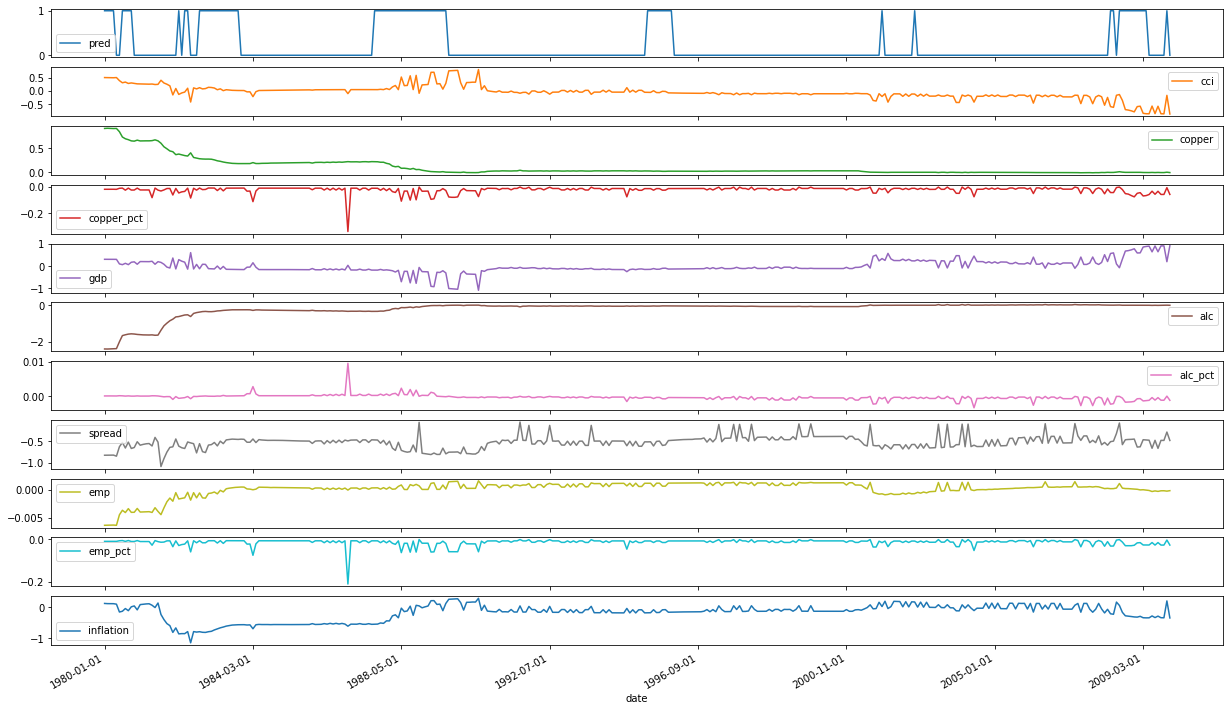

In [3]:
logi_results.plot(x='date', subplots=True, layout=(11,1), figsize=(21,13))

In [4]:
factors = [
    'cci', 'copper', 'copper_pct', 'gdp', 'alc', 'alc_pct',
    'spread', 'emp', 'emp_pct', 'inflation' 
]
logi_dict = logi_results.loc[len(logi_results) - 1].drop('date').drop('pred')
pf, pv, nf, nv, lf, lv = factorWeightings(factors, logi_dict)
print('Most Positive Factor Weight: %s  %.4f' % (pf, pv))
print('Most Negative Factor Weight: %s %.4f' % (nf, nv))
print('Least Important Factor Weight: %s %.4f' % (lf, lv))

Most Positive Factor Weight: gdp  0.9211
Most Negative Factor Weight: cci -0.8650
Least Important Factor Weight: copper_pct -0.0570


In [5]:
print('Logistical Regression Report')
print(classification_report(
    logi_class_rep['actual'], logi_class_rep['pred'],
    target_names= ['no recession', 'recession']
    )
)

Logistical Regression Report
              precision    recall  f1-score   support

no recession       0.88      0.83      0.85       304
   recession       0.28      0.38      0.32        56

    accuracy                           0.76       360
   macro avg       0.58      0.60      0.59       360
weighted avg       0.79      0.76      0.77       360



array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

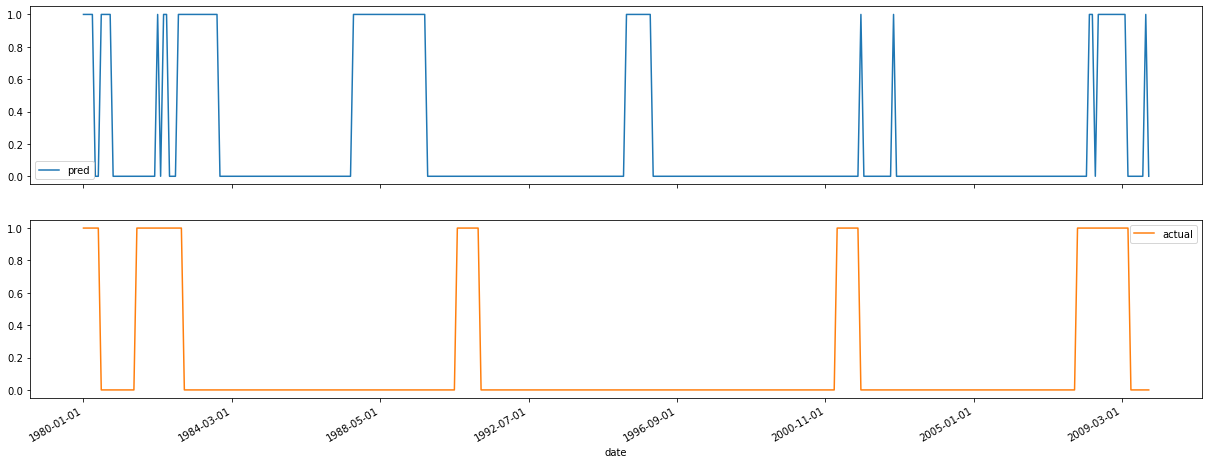

In [6]:
logi_class_rep.plot(x='date', subplots=True, figsize=(21,8))

# Random Forest

array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

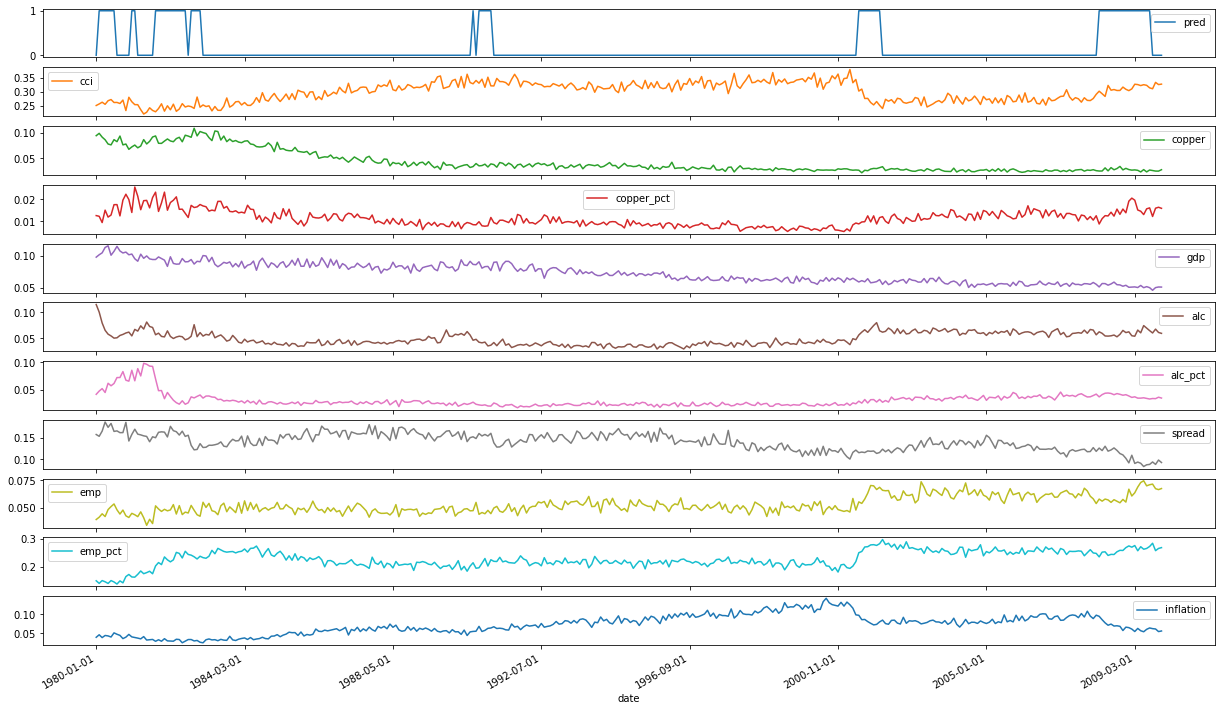

In [7]:
rf_results.plot(x='date', subplots=True, layout=(11,1), figsize=(21,13))

In [8]:
rf_dict = rf_results.loc[len(rf_results) - 1].drop('date').drop('pred')
pf, pv, nf, nv, lf, lv = factorWeightings(factors, rf_dict)
print('Most Positive Factor Weight: %s  %.4f' % (pf, pv))
print('Least Important Factor Weight: %s %.4f' % (nf, nv))

Most Positive Factor Weight: emp_pct  0.2681
Least Important Factor Weight: copper_pct 0.0159


In [9]:
print('Random Forest Report')
print(classification_report(
    rf_class_rep['actual'], rf_class_rep['pred'],
    target_names= ['no recession', 'recession']
    )
)

Random Forest Report
              precision    recall  f1-score   support

no recession       0.96      0.96      0.96       304
   recession       0.80      0.79      0.79        56

    accuracy                           0.94       360
   macro avg       0.88      0.87      0.88       360
weighted avg       0.94      0.94      0.94       360



array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

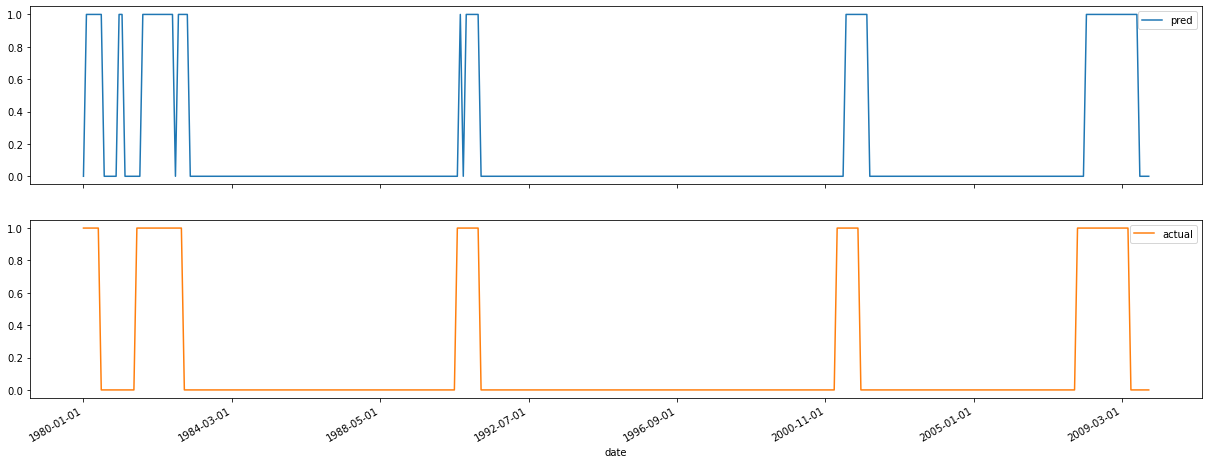

In [10]:
rf_class_rep.plot(x='date', subplots=True, figsize=(21,8))

# Gradient Boosted Trees

array([[<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>]], dtype=object)

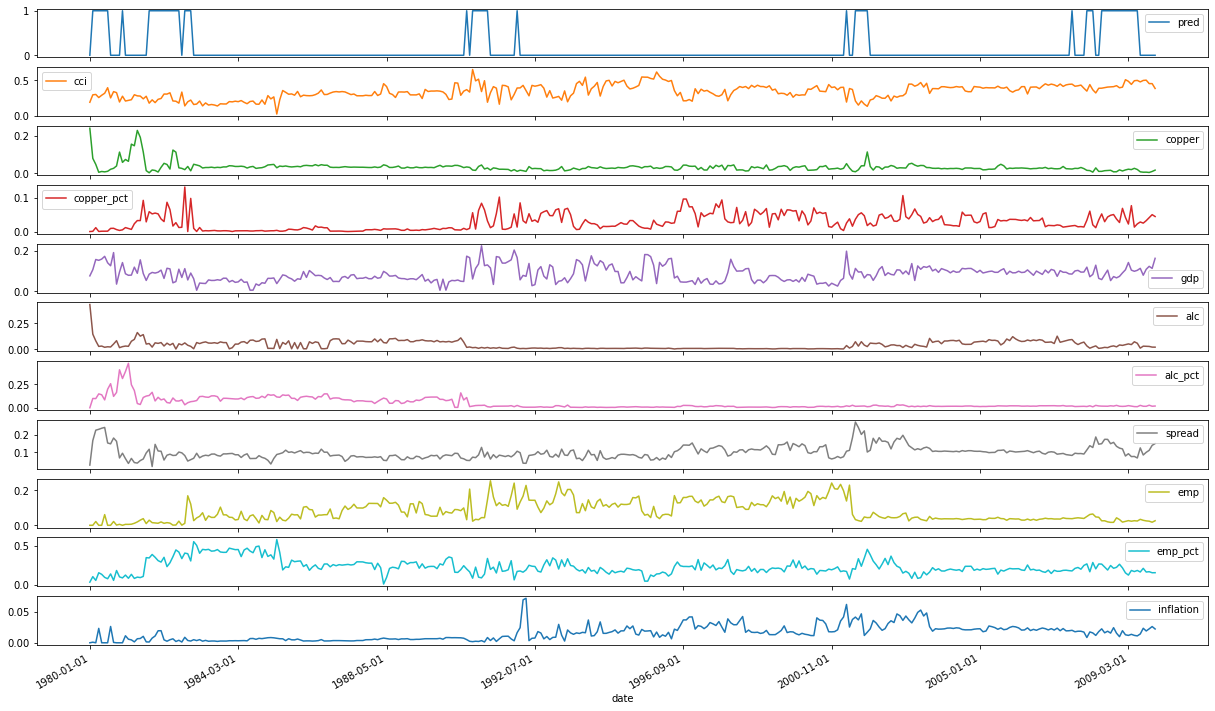

In [11]:
gb_results.plot(x='date', subplots=True, layout=(11,1), figsize=(21,13))

In [12]:
gb_dict = gb_results.loc[len(gb_results) - 1].drop('date').drop('pred')
pf, pv, nf, nv, lf, lv = factorWeightings(factors, gb_dict)
print('Most Positive Factor Weight: %s  %.4f' % (pf, pv))
print('Least Important Factor Weight: %s %.4f' % (nf, nv))

Most Positive Factor Weight: gdp  0.1619
Least Important Factor Weight: copper 0.0162


In [13]:
print('Gradient Boosted Trees Report')
print(classification_report(
    gb_class_rep['actual'], gb_class_rep['pred'],
    target_names= ['no recession', 'recession']
    )
)

Gradient Boosted Trees Report
              precision    recall  f1-score   support

no recession       0.96      0.97      0.97       304
   recession       0.85      0.79      0.81        56

    accuracy                           0.94       360
   macro avg       0.90      0.88      0.89       360
weighted avg       0.94      0.94      0.94       360



array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

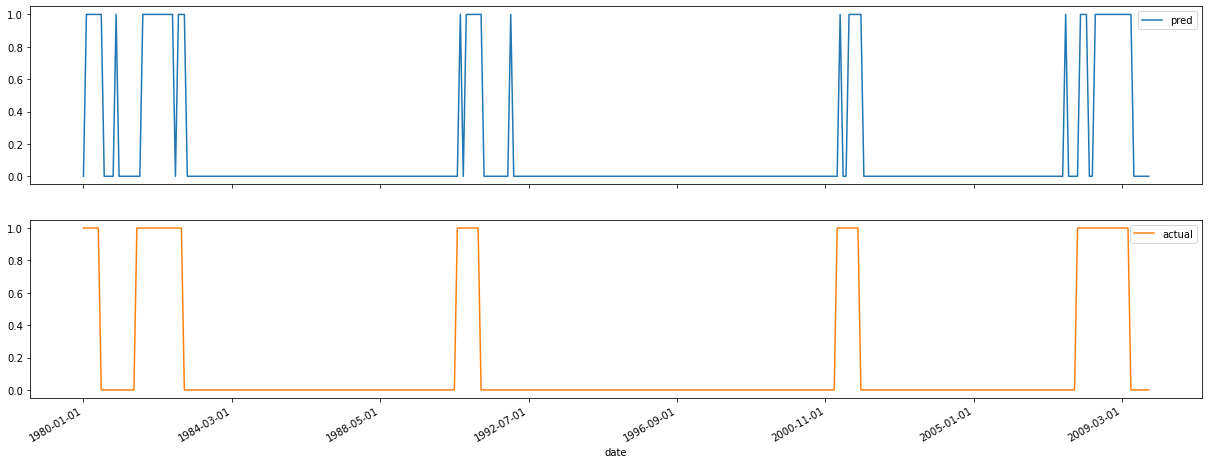

In [14]:
gb_class_rep.plot(x='date', subplots=True, figsize=(21,8))